In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df=pd.read_csv("Data.csv") # read data
df.head() #display top 5 rows


,education,Age,Gender,Smoking,BP,BMI,CVD Risk,WeightKg,HeightCm,Height 2
0,Graduation,43,F,No,90 / 130,30.120482,2,83,166,27556
1,Graduation,45,M,No,80 / 120,29.370000,3,79,164,26896
2,No,42,F,No,90 / 150,37.180000,3,94,159,25281
3,Primary,51,F,No,80 / 120,34.230000,3,76,149,22201
4,No,42,F,No,70 / 120,26.110000,2,66,159,25281


In [ ]:
df.info() # to see overall view of data including datatype and missing values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   education  1305 non-null   object 
 1   Age        1305 non-null   int64  
 2   Gender     1305 non-null   object 
 3   Smoking    1305 non-null   object 
 4   BP         1305 non-null   object 
 5   BMI        1305 non-null   float64
 6   CVD Risk   1299 non-null   object 
 7   WeightKg   1305 non-null   int64  
 8   HeightCm   1305 non-null   int64  
 9   Height 2   1305 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 102.1+ KB


**Interpretation** :


There are total 10 columns with 1305 rows.  Only one column CVD Risk has 6 missing values.


*   5 columns are categorical             
*   5 columns are numerical

**Note :** The column CVD Risk and BP has numerical values but python says it is categorical so its data type must be corrected by changing from categorical to numerical datatype.

                  







In [ ]:
### Handling wrong data types

# Standardize the delimiter by replacing ' / ' with '/' to handle inconsistent formatting
df['BP_standardized'] = df['BP '].str.replace(' / ', '/', regex=False)

# Split the standardized 'BP' column into 'BP_Systolic' and 'BP_Diastolic' columns
df[['BP_Systolic', 'BP_Diastolic']] = df['BP_standardized'].str.split('/', expand=True)

# Convert the new columns to numeric type, stripping any leading/trailing spaces and coercing errors
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'].str.strip())
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'].str.strip())
# Drop the intermediate 'BP_standardized' column if not needed
df.drop(columns=['BP_standardized'], inplace=True)

# Display the first few rows with the new columns and their data types
df[['BP ', 'BP_Systolic', 'BP_Diastolic']].head()
df[['BP_Systolic', 'BP_Diastolic']].info()
df.drop(columns=['BP '], inplace=True) # Now there is no need of reference column BP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BP_Systolic   1305 non-null   int64
 1   BP_Diastolic  1305 non-null   int64
dtypes: int64(2)
memory usage: 20.5 KB


In [ ]:
## Lets see what kind of information present in each categorical column
print("Information present in categorical columns :")
print(f"1- Education level : {df['education'].unique()}")
print(f"2- Smoking status : {df['Smoking'].unique()}")
print(f"3- Gender types : {df['Gender'].unique()}")

Information present in categorical columns :
1- Education level : ['Graduation' 'No' 'Primary' 'Secondary' 'NOT DONE' 'Masters' 'M.Phil/Phd']
2- Smoking status : ['No' 'Cigarettes' 'Tobacco' 'Cigar']
3- Gender types : ['F' 'M']


In [ ]:
# ---Duplicate Rows

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Duplicate rows are deleted successfully")

# -- Duplicate Column Height 2 should be removed as it is  simply the square of HeighCm column and un-necessary to keep
df.drop(columns=['Height 2'], inplace=True)
print("'Height 2' column dropped successfully.")
df.head()


Number of duplicate rows: 2
Duplicate rows are deleted successfully
'Height 2' column dropped successfully.


,education,Age,Gender,Smoking,BMI,CVD Risk,WeightKg,HeightCm,BP_Systolic,BP_Diastolic
0,Graduation,43,F,No,30.120482,2,83,166,90,130
1,Graduation,45,M,No,29.370000,3,79,164,80,120
2,No,42,F,No,37.180000,3,94,159,90,150
3,Primary,51,F,No,34.230000,3,76,149,80,120
4,No,42,F,No,26.110000,2,66,159,70,120


In [ ]:
df.head()

,education,Age,Gender,Smoking,BMI,CVD Risk,WeightKg,HeightCm,BP_Systolic,BP_Diastolic
0,Graduation,43,F,No,30.120482,2,83,166,90,130
1,Graduation,45,M,No,29.370000,3,79,164,80,120
2,No,42,F,No,37.180000,3,94,159,90,150
3,Primary,51,F,No,34.230000,3,76,149,80,120
4,No,42,F,No,26.110000,2,66,159,70,120


In [ ]:
print(df['CVD Risk'].unique())

['2' '3' '11' '12' '8' '14' '4' '10' '13' '5' '6' '16' '15' '9' '18' nan
 '>30' '19' '17' '7' '24' '20' '22' '1' '21' '23' '25' '28']


**Interpretation**: The values present in CVD Risk column is numerical with some invalid entres having value '>30' and also some missing values




In [ ]:
# --  Dealing with incorrect data entry values

# First, replace the string value '>30' with the integer 30
df['CVD Risk'] = df['CVD Risk'].replace('>30', 30)

# Convert the 'CVD Risk' column to a numeric type.

df['CVD Risk'] = pd.to_numeric(df['CVD Risk'])

# Now that the column is numeric, replace any values greater than 30 with 30
df.loc[df['CVD Risk'] > 30, 'CVD Risk'] = 30

print(f"CVD Risk Score : \n{df['CVD Risk'].unique()}") # printing updated CVD Risk Scores

CVD Risk Score : 
[ 2.  3. 11. 12.  8. 14.  4. 10. 13.  5.  6. 16. 15.  9. 18. nan 30. 19.
 17.  7. 24. 20. 22.  1. 21. 23. 25. 28.]


**Interpretation and reasoning**:
According to domain knowledge the CVD Risk scale range is 1-30.

So any value above 30 are invalid data entry errors that's why I have rectified the wrong CDV Risk Scores data entry error which is '>30'
(by replacing it with 30)

**Interpretation** : There are total 6 missing values in CVD Risk column which needs to be imputed with mean/median.I have checked its histogram that tells data is Right skewed.

In [ ]:
df.columns

Index(['education', 'Age', 'Gender', 'Smoking', 'BMI ', 'CVD Risk', 'WeightKg',
       'HeightCm', 'BP_Systolic', 'BP_Diastolic'],
      dtype='object')

In [ ]:
# ---  Detection and handling  outliers
numerical_columns = ['Age','BMI ','CVD Risk','WeightKg','HeightCm','BP_Systolic', 'BP_Diastolic']

#check for outliers (using IQR method for numerical continous columns)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in {col}: {len(outliers)}")
    # Display a few outlier examples
    # display(outliers[[col]])


Number of outliers in Age: 0

Number of outliers in BMI : 24

Number of outliers in CVD Risk: 22

Number of outliers in WeightKg: 19

Number of outliers in HeightCm: 4

Number of outliers in BP_Systolic: 1

Number of outliers in BP_Diastolic: 21


**Interpretation**:
I have identified outliers.Next step is to handle them.

In [ ]:
# Handling outliers: Instead of removing them, I will cap them at the upper and lower bounds.
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
#imputation of CVD Risk score with median
df['CVD Risk'].fillna(df['CVD Risk'].median(), inplace=True)
print(f"Missing values in CVD Risk column are:  {df['CVD Risk'].isnull().sum()}")

Missing values in CVD Risk column are:  0


/tmp/ipython-input-53248954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CVD Risk'].fillna(df['CVD Risk'].median(), inplace=True)


In [ ]:
df.columns.isna().sum()

np.int64(0)

**Reasoning**:
I have removed duplicate rows,imputed missing values with median,removed outliers,handled the data entry errors corrected the data types.
The data cleaning is done now. Now its time to do univariate analysis.

In [ ]:
df['education'] = df['education'].replace('NOT DONE', 'No')
print("Updated unique values in 'education' column:")
print(df['education'].unique())

Updated unique values in 'education' column:
['Graduation' 'No' 'Primary' 'Secondary' 'Masters' 'M.Phil/Phd']


**Interpretation and reasoning**: Since the education level 'No' and 'NOT DONE' represent same education level which means the person has no formal education. so these can be considered as 'No' for our current scenario.


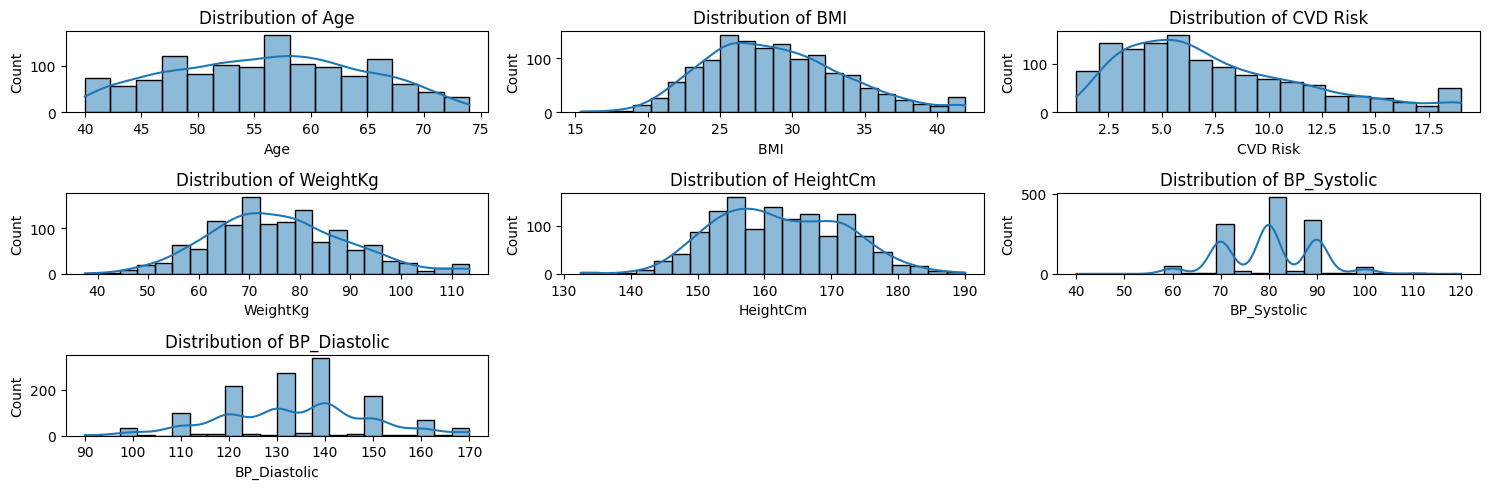

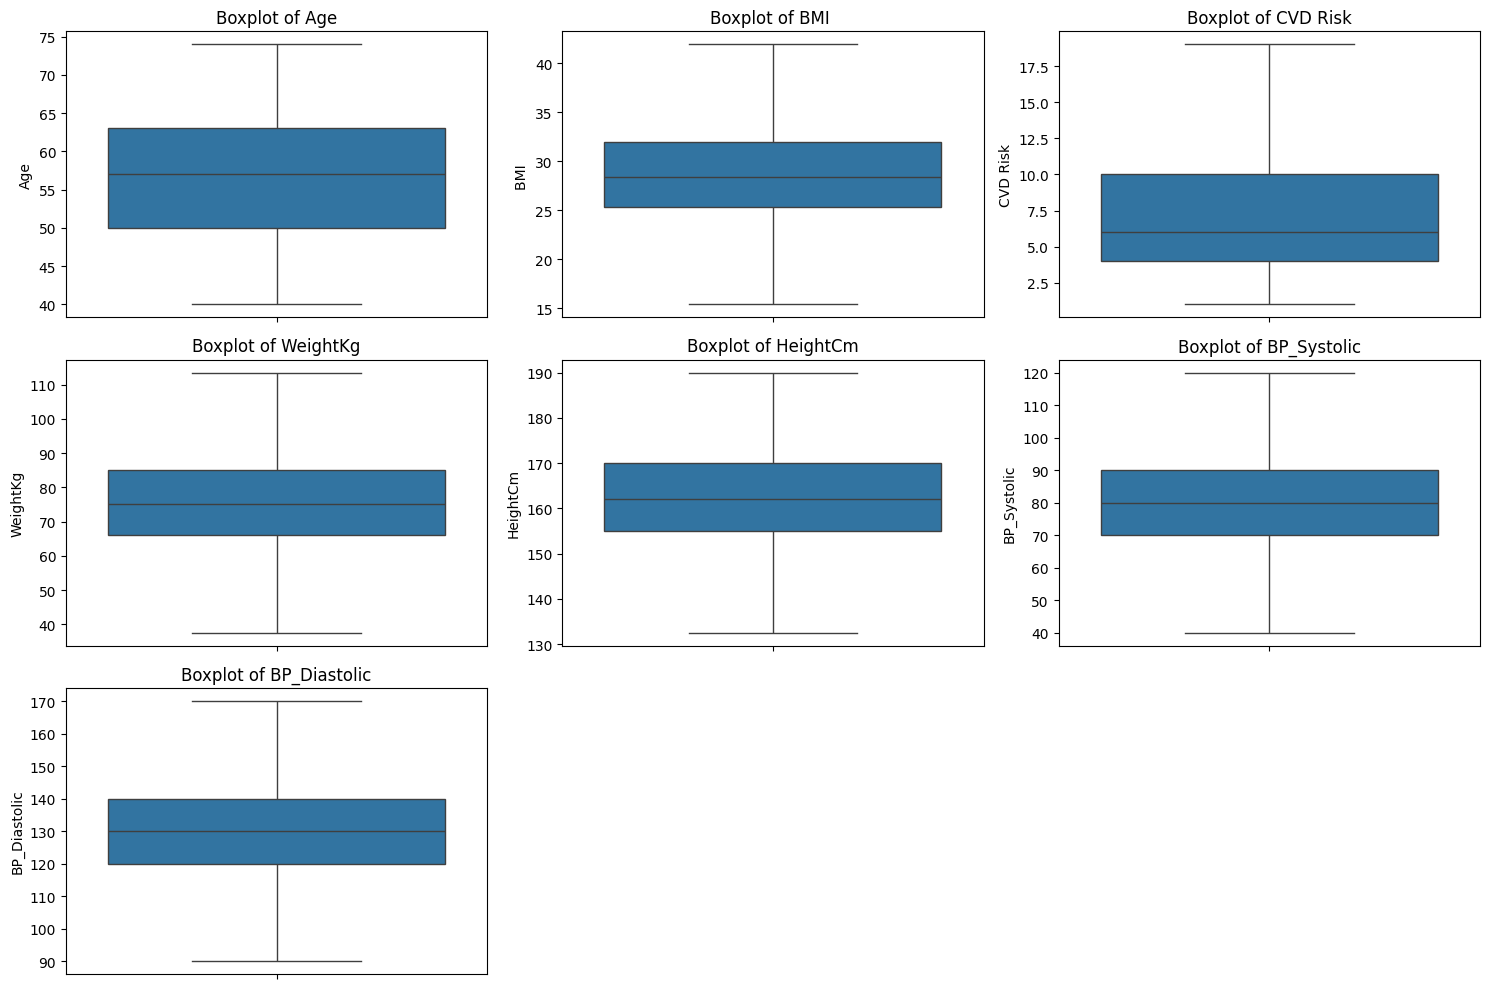

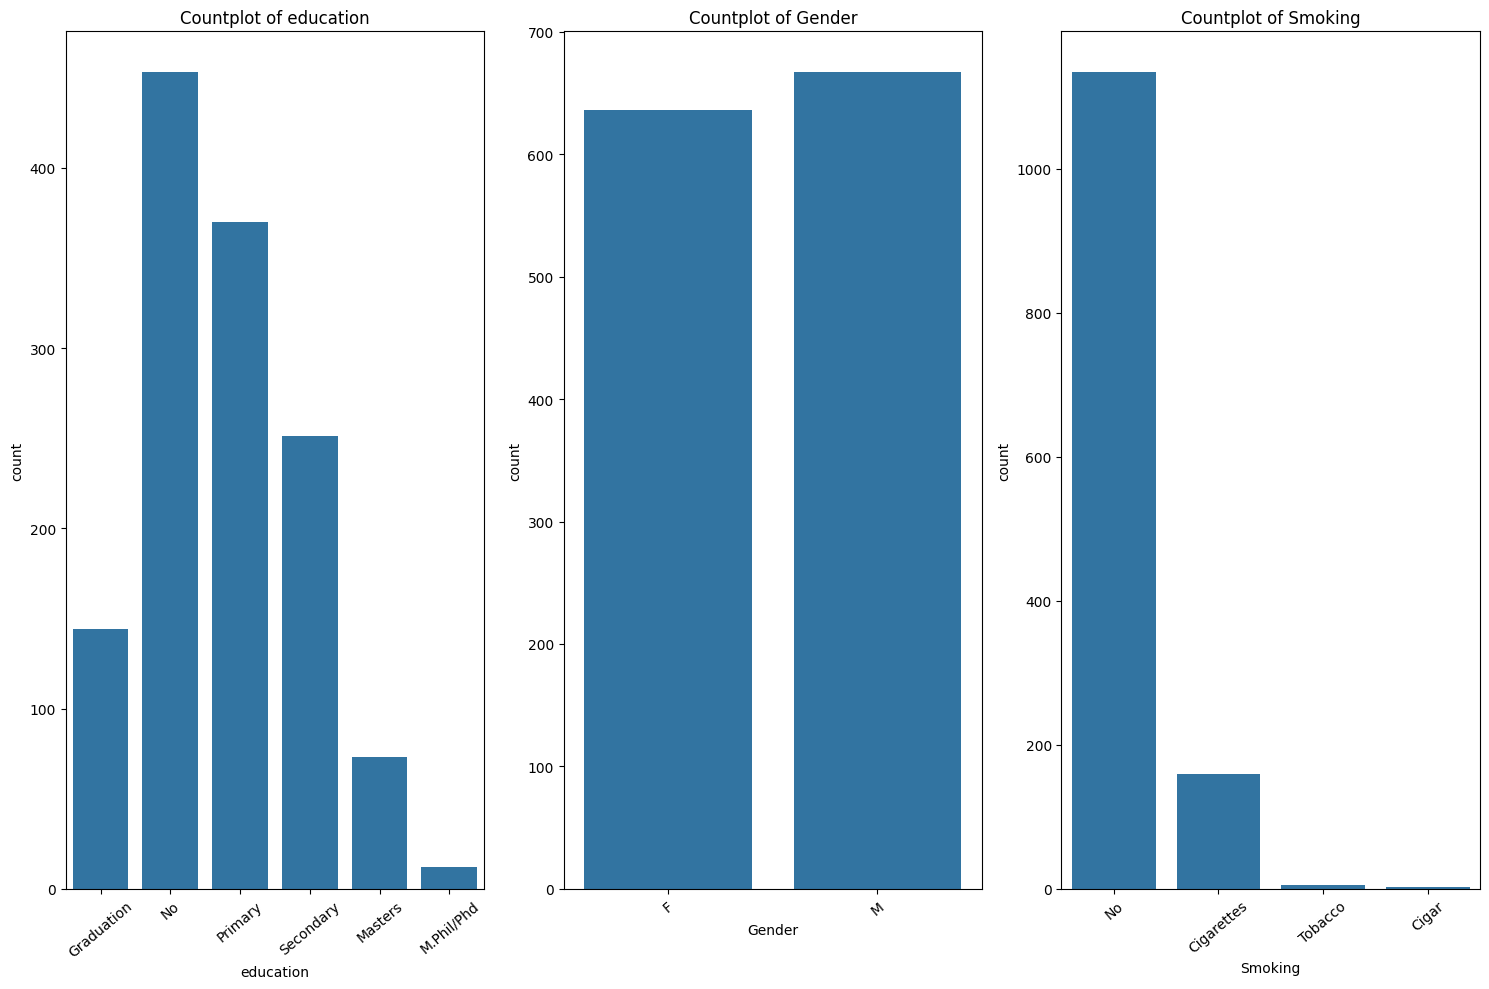

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Histograms for numerical columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Boxplots for numerical features to visualize the distribution of the data.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Countplots for categorical columns
plt.figure(figsize=(15, 10))
categorical_cols = ['education','Gender','Smoking']
for i, col in enumerate(categorical_cols):
  plt.subplot(1,3,i+1)
  sns.countplot(x=df[col])
  plt.xticks(rotation=40)
  plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

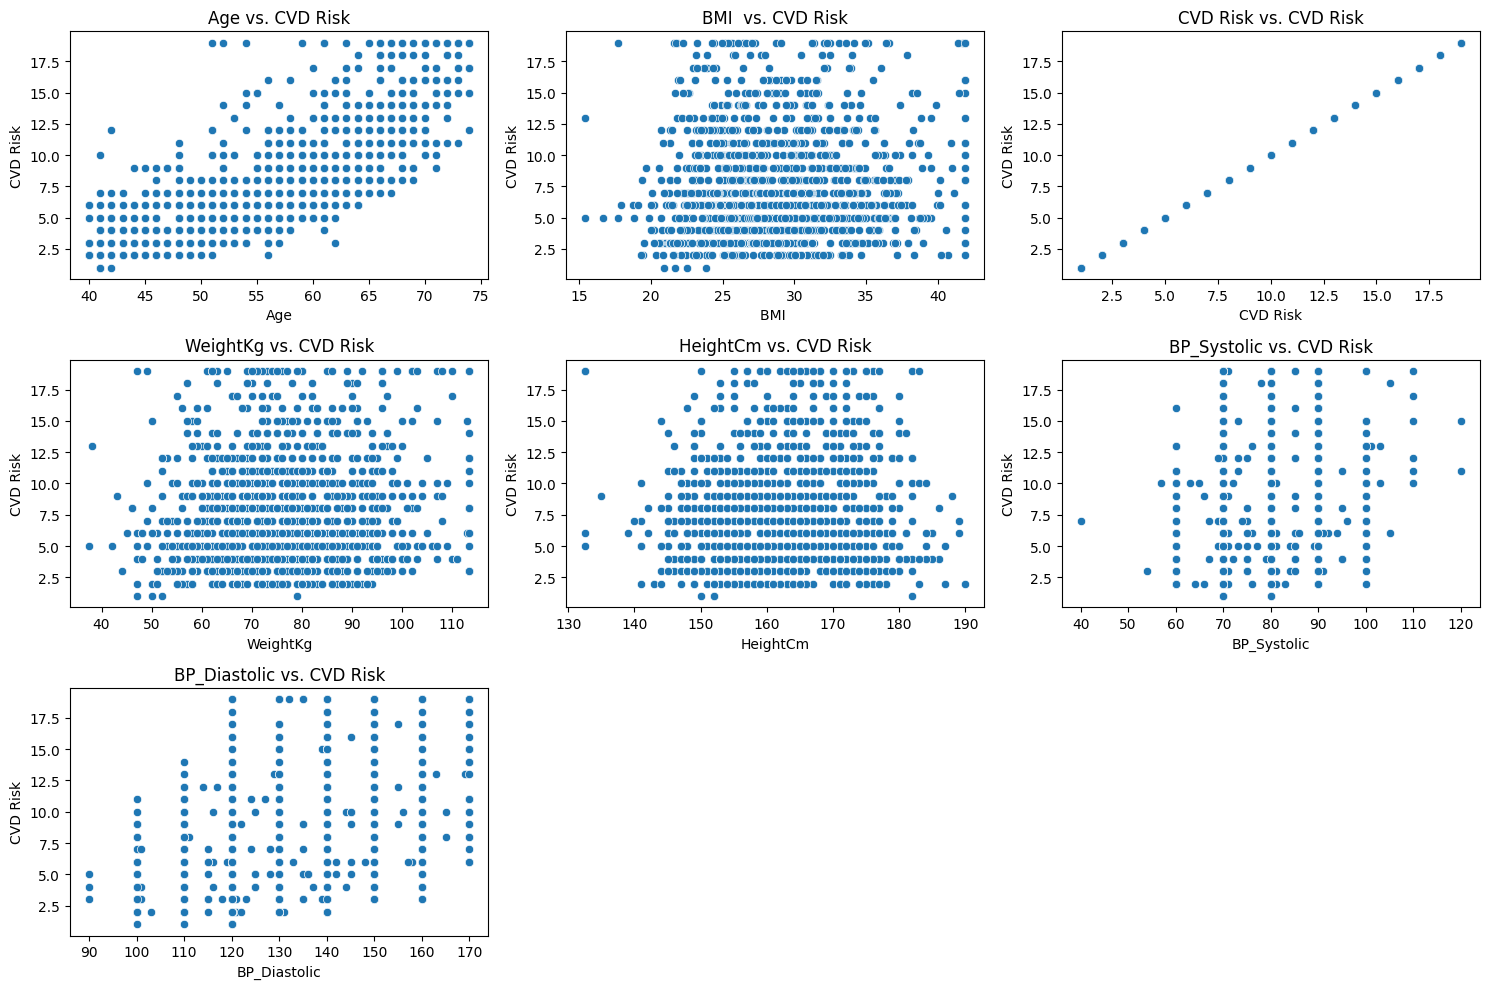

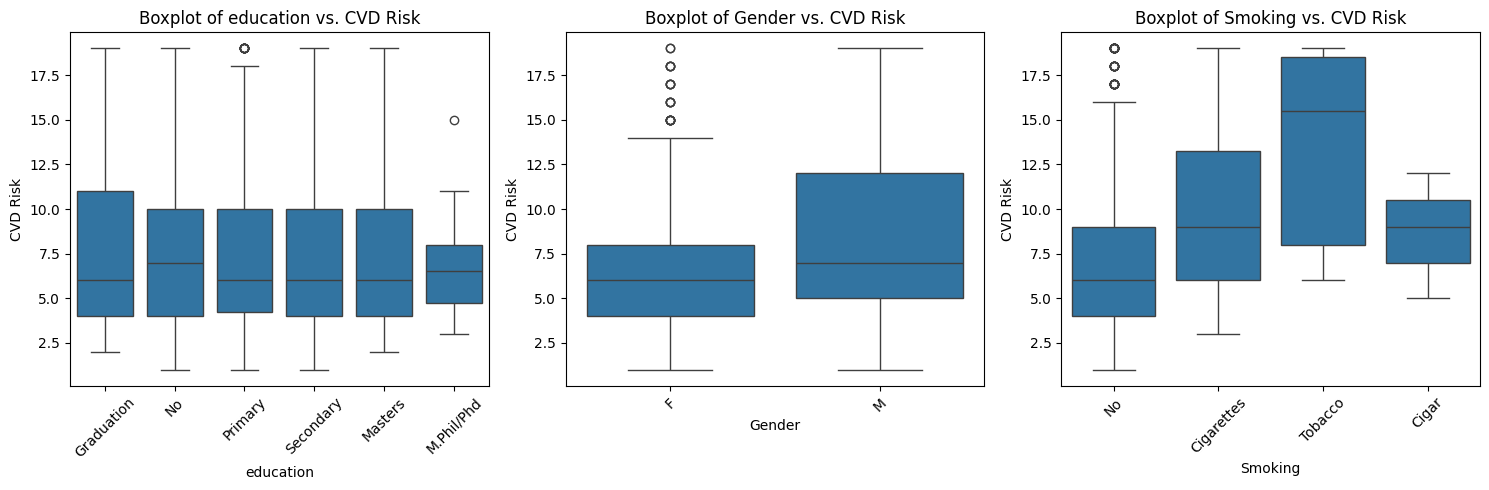

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(15, 10))

# Scatter plots for numerical features vs. CVD Risk
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['CVD Risk'])
    plt.title(f'{col} vs. CVD Risk')
plt.tight_layout()
plt.show()


# Boxplots for categorical features vs. CVD_Risk
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], y=df['CVD Risk'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} vs. CVD Risk')

plt.tight_layout()
plt.show()


**Reasoning :** The education categories 'No' and 'Not done' represent same education level so there is no need to keep it furthur for model training.

In [ ]:
#-- Label Encoding for categorical variables
# since we have ordinal varaible named education with saveral categories and we need to perform label encoding.
# Encode 'education' column using Label Encoding as education is ordinal

le = LabelEncoder()
df['education'] =le.fit_transform(df['education'])

# Apply One-Hot Encoding to 'Gender' columns as it is nominal.
df = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype=int)

#Filtering of smokers and non-smokers
df['SmokerStatus'] = df['Smoking'].apply(lambda x: 'Yes' if x in ['Cigar', 'Cigarettes', 'Tobacco'] else 'No')
df.drop(columns=['Smoking'], inplace=True)


#aaplying one hot encoding on smoking status
df = pd.get_dummies(df, columns=['SmokerStatus'], drop_first=True, dtype=int)
df.head(10)


,education,Age,BMI,CVD Risk,WeightKg,HeightCm,BP_Systolic,BP_Diastolic,Gender_M,SmokerStatus_Yes
0,0,43,30.120482,2.0,83.0,166.0,90,130,0,0
1,0,45,29.370000,3.0,79.0,164.0,80,120,1,0
2,3,42,37.180000,3.0,94.0,159.0,90,150,0,0
3,4,51,34.230000,3.0,76.0,149.0,80,120,0,0
4,3,42,26.110000,2.0,66.0,159.0,70,120,0,0
5,3,66,22.840000,11.0,66.0,170.0,80,140,1,0
6,3,69,33.320000,12.0,78.0,153.0,90,140,0,0
7,5,49,35.090000,3.0,80.0,151.0,71,120,0,0
8,4,59,36.980000,8.0,90.0,156.0,90,150,0,0
9,5,44,33.590000,2.0,86.0,160.0,80,130,0,0


**Interpretation** : There are 6 type of  different categories present in ordinal varaible 'education' so 6 types of labels are assigned to it.



In [ ]:
# #rename SmokerStatus_yes as SmokerStatus ans renameing Gender_M as Gender
df.rename(columns={'SmokerStatus_Yes': 'SmokerStatus'}, inplace=True)
df.rename(columns={'Gender_M': 'Gender'}, inplace=True)

print("DataFrame after Label Encoding for education,and One-Hot Encoding for Gender")
df.head(10)

DataFrame after Label Encoding for education,and One-Hot Encoding for Gender


,education,Age,BMI,CVD Risk,WeightKg,HeightCm,BP_Systolic,BP_Diastolic,Gender,SmokerStatus
0,0,43,30.120482,2.0,83.0,166.0,90,130,0,0
1,0,45,29.370000,3.0,79.0,164.0,80,120,1,0
2,3,42,37.180000,3.0,94.0,159.0,90,150,0,0
3,4,51,34.230000,3.0,76.0,149.0,80,120,0,0
4,3,42,26.110000,2.0,66.0,159.0,70,120,0,0
5,3,66,22.840000,11.0,66.0,170.0,80,140,1,0
6,3,69,33.320000,12.0,78.0,153.0,90,140,0,0
7,5,49,35.090000,3.0,80.0,151.0,71,120,0,0
8,4,59,36.980000,8.0,90.0,156.0,90,150,0,0
9,5,44,33.590000,2.0,86.0,160.0,80,130,0,0


In [ ]:
df.to_csv('processed_datafile.csv', index=False)
print('DataFrame saved to processed_datafile.csv successfully') #data frame will be downloaded to  my system

DataFrame saved to processed_datafile.csv successfully


In [ ]:
df.head(10)

,education,Age,BMI,CVD Risk,WeightKg,HeightCm,BP_Systolic,BP_Diastolic,Gender,SmokerStatus
0,0,43,30.120482,2.0,83.0,166.0,90,130,0,0
1,0,45,29.370000,3.0,79.0,164.0,80,120,1,0
2,3,42,37.180000,3.0,94.0,159.0,90,150,0,0
3,4,51,34.230000,3.0,76.0,149.0,80,120,0,0
4,3,42,26.110000,2.0,66.0,159.0,70,120,0,0
5,3,66,22.840000,11.0,66.0,170.0,80,140,1,0
6,3,69,33.320000,12.0,78.0,153.0,90,140,0,0
7,5,49,35.090000,3.0,80.0,151.0,71,120,0,0
8,4,59,36.980000,8.0,90.0,156.0,90,150,0,0
9,5,44,33.590000,2.0,86.0,160.0,80,130,0,0
